<a href="https://colab.research.google.com/github/VimalChamyal/Linear-Regression/blob/main/Petrol_price_prediction_using_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [30]:
url = 'https://github.com/VimalChamyal/Linear-Regression/raw/main/petrol_consumption.csv'

In [31]:
df = pd.read_csv(url)
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.shape

(48, 5)

In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


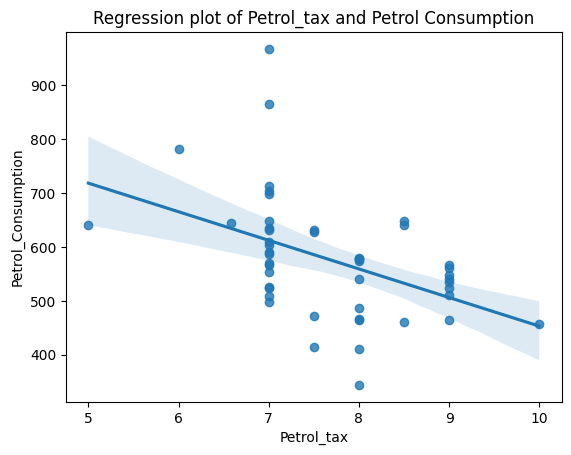

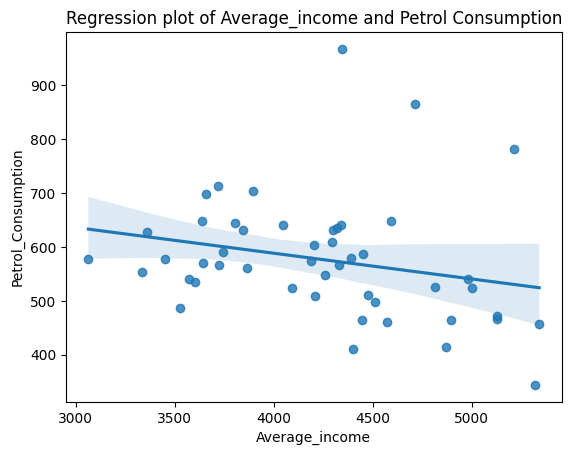

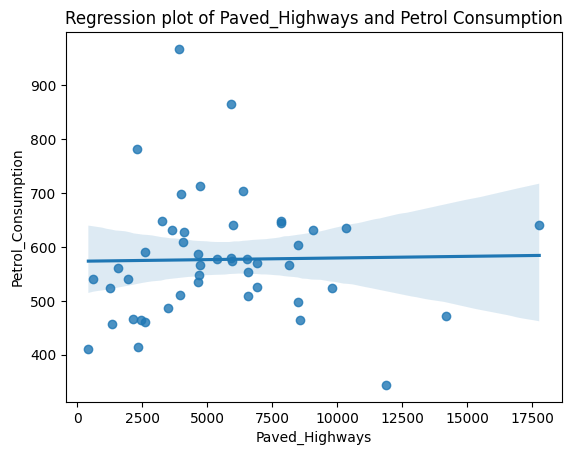

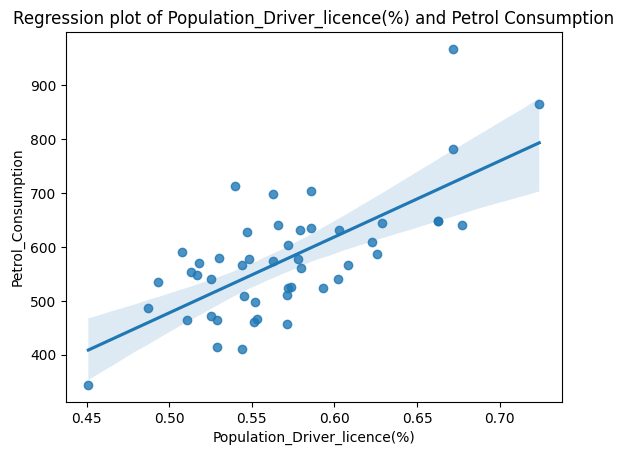

In [6]:
import matplotlib.pyplot as plt

import seaborn as sns

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

We can see strong +ve linear relationship of driver_licence with consumption. To get better idea we can check out the correlation matrix

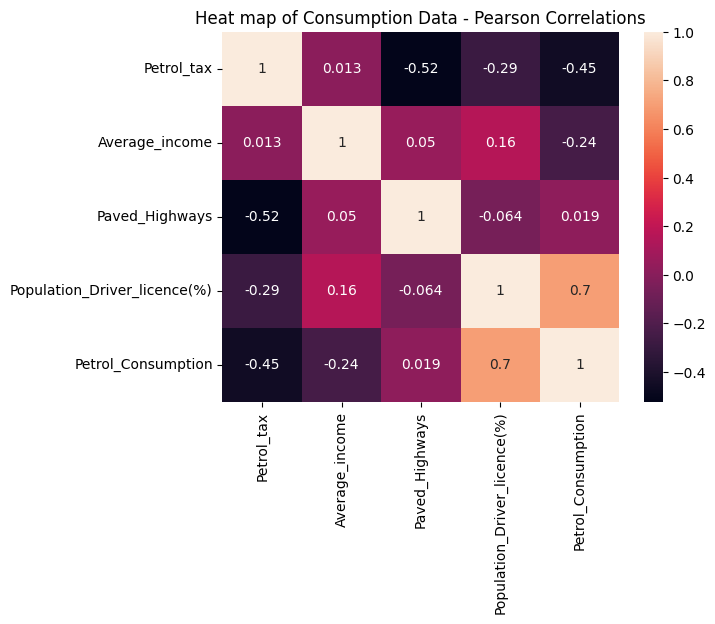

In [8]:
correlations = df.corr()

sns.heatmap(correlations, annot=True).set(title='Heat map of Consumption Data - Pearson Correlations');
# annot=True displays the correlation values

We can clearly see that Petrol_tax has a good negative linear relationship of -0.45 and -0.24 with Petrol_Consumption. Population_Driver_license(%) has a strong positive linear relationship of 0.7 with Petrol_Consumption.

But Average_income and Paved_Highways correlation with Petrol_Consumption is very weak. Hence definetly we can go ahead and remove them

We will 1st check by including all the columns (WE AREN'T REMOVING ANY OF THE COLUMNS AT THE 1ST PLACE)

In [9]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
# Training a Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
print(regressor.intercept_)
print(regressor.coef_)

361.45087906668397
[-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]


In [17]:
# Making Predictions

y_pred = regressor.predict(X_test)

In [18]:
# Evaluating our model

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [19]:
regressor.score(X_test, y_test)

# To find R^2 (we can use this function directly)

0.39136640014305457

In [21]:
regressor.score(X_train, y_train)

# We can conclude: OVERFITTING (Model is performing good in training data but not in test)

0.7068781342155135

WE CAN SEE CLEARLY THAT BY INCLUDING THE COLUMNS WHICH DON'T CORRELATE GOOD WITH OUR TARGET VARIABLE IT RESULTS IN OVERFITTING/ WRONG PREDICTIONS.

Hence now we will try by removing Paved_Highways column. This column had the weakest correlation with our target ( petrol consumption )

In [22]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Population_Driver_licence(%)', 'Petrol_tax']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
print(regressor.intercept_)
print(regressor.coef_)

205.3924067659667
[-6.02546714e-02  1.45406944e+03 -2.57826030e+01]


In [26]:
y_pred = regressor.predict(X_test)

In [27]:
# Evaluating our model

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 52.11
Mean squared error: 3658.83
Root mean squared error: 60.49


In [28]:
regressor.score(X_test, y_test)

0.45462891766549574

In [29]:
regressor.score(X_train, y_train)

0.6963601784723379

Many factors seem to have contributed for bad prediction:

1. Need for more data
2. Overfitting needs to be addressed by cross validation
3. Poor features
4. Assumptions that don't hold